# Assignment 2

#### Author: Siyan Sriganeshan

In [29]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

In [30]:
import pandas as pd

##Nessasary if SSLCertVerificationError occurs
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
##Nessasary if SSLCertVerificationError occurs

from ucimlrepo import fetch_ucirepo 

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 


Xbackup = X
ybackup = y

# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Task 2

In [31]:
print(X.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

In [32]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None


In [33]:
print(X.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [34]:
print(X.age)
print(y)

0        39
1        50
2        38
3        53
4        28
         ..
48837    39
48838    64
48839    38
48840    44
48841    35
Name: age, Length: 48842, dtype: int64
       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


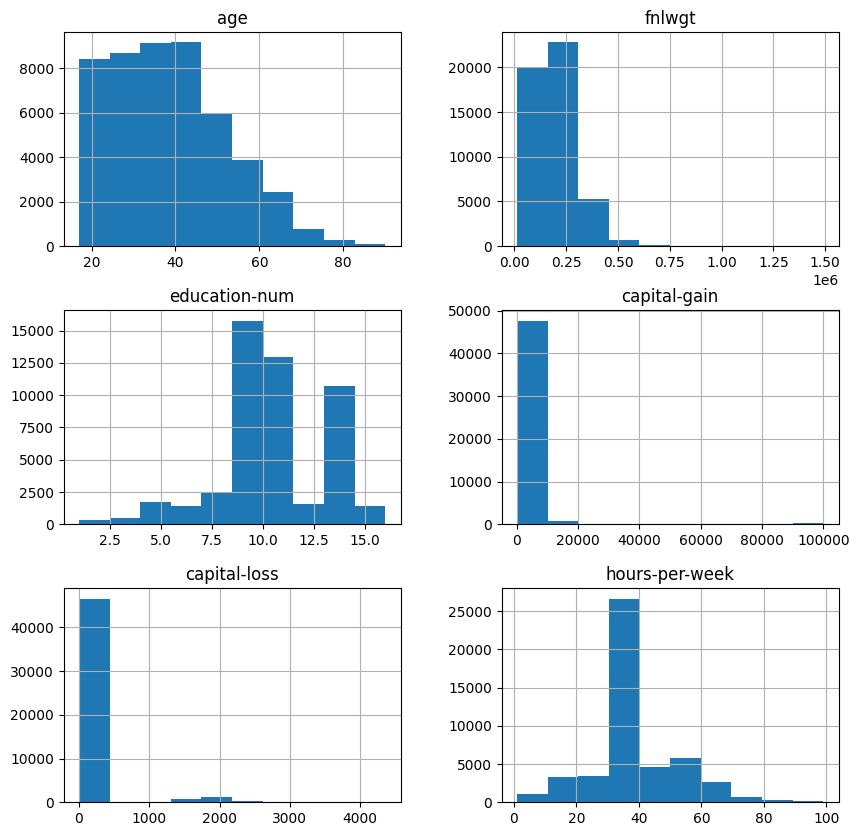

In [35]:
X.hist(figsize=(10, 10))
plt.show()

## Task 3

In [36]:

#count all '?' 

for item in X.columns: #loop for columns
    i = 0
    count = 0 # '?' count
    while(i < len(X[item])): #loop for each entry in category 
        if(X[item][i] == '?'):
            count+=1
        i+=1 
    right_padding = ('{: <20}'.format(item))    #output formatting
    print(f"{right_padding} {count}")

age                  0
workclass            1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       583


## Task 4

In [ ]:
#Fill all '?' with null (None)
for item in X.columns: #loop for columns
    i = 0
    while(i < len(X[item])): #loop for each entry in category 
        if(X[item][i] == '?'): 
            X[item][i] = None
        i+=1 


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


## Task 5

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [40]:
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()


# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Create a ColumnTransformer to apply the pipelines to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])


# Apply the preprocessing pipeline to the entire dataset
X_prepared = preprocessor.fit_transform(X)

# Print the shape of the preprocessed data
print(X_prepared.shape)

(48842, 108)


## Task 6

In [41]:
print(y.value_counts())

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


## Task 7

In [42]:
i = 0

#change "<=50K." to "<=50K" and ">50K." to ">50K" 
while i < len(y['income']):
    if(y['income'][i] == '<=50K.'):
        y['income'][i] = '<=50K'
    if(y['income'][i] == '>50K.'):
        y['income'][i] = '>50K'
    i+=1


C:\Users\kisha\AppData\Local\Temp\ipykernel_9080\397586781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'][i] = '<=50K'
C:\Users\kisha\AppData\Local\Temp\ipykernel_9080\397586781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'][i] = '>50K'


In [43]:
print(y.value_counts())

income
<=50K     37155
>50K      11687
Name: count, dtype: int64


## Task 8

In [44]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 108) (39073, 1) (9769, 108) (9769, 1)


## Task 9

In [45]:
from sklearn import svm

subset_size = 10000

model_svm = svm.SVC(kernel='poly', C=0.1, gamma=1) #Initialize support vector machine
model_svm.fit(X_train[:subset_size], y_train[:subset_size].values.ravel()) #train the model with subset of data (10000)

SVC(C=0.1, gamma=1, kernel='poly')

In [46]:
from sklearn.metrics import classification_report


y_predict = model_svm.predict(X_test) #predict using the model created

report = classification_report(y_test, y_predict) #make report acutal vs prediction

print(report)

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.59      0.61      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



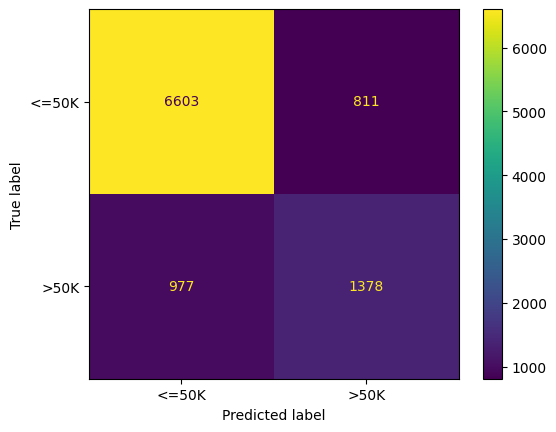

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict) #visualization of results

## Task 10

In [48]:
X_train, X_validation_test, y_train, y_validaiton_test, = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validaiton_test, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 108) (29305, 1) (9768, 1) (9769, 108) (9769, 1)


In [49]:
from sklearn.model_selection import GridSearchCV

svm_parameters = {
                    'kernel' : ['rbf'],
                    'C' : [0.01, 0.1, 1, 10],
                    'gamma' : [0.01, 1, 10]
                }

svm = svm.SVC()

svm_gs = GridSearchCV(estimator=svm,
                      param_grid= svm_parameters)

svm_gs.fit(X_train[:subset_size], y_train[:subset_size].values.ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.847051597051597

In [50]:
print(svm_winner)

SVC(C=10, gamma=0.01)


In [51]:
from sklearn import svm

subset_size = 10000

model_svm = svm.SVC(kernel='poly', C=10, gamma=0.01)
model_svm.fit(X_train[:subset_size], y_train[:subset_size].values.ravel())

SVC(C=10, gamma=0.01, kernel='poly')

In [52]:
from sklearn.metrics import classification_report


y_predict = model_svm.predict(X_test)

report = classification_report(y_test, y_predict)

print(report)

              precision    recall  f1-score   support

       <=50K       0.83      0.97      0.90      7474
        >50K       0.81      0.36      0.50      2295

    accuracy                           0.83      9769
   macro avg       0.82      0.67      0.70      9769
weighted avg       0.83      0.83      0.81      9769



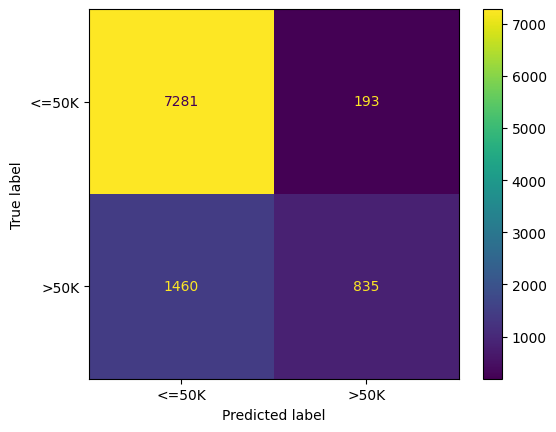

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict) 